# MNIST demo

In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import math
import os
import plotly.graph_objects as go

from datetime import datetime

def show_numbers(x, y, n_display=9, title='MNIST'):
    n_cells = math.ceil(math.sqrt(n_display))
    fig = plt.figure(figsize=(5,5))

    for i in range(n_display):
        plt.subplot(n_cells, n_cells, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap='gray')
        # plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(y[i])

    fig.suptitle(title)    
#     fig.savefig(f"{title}.png")
    plt.show()
    
def load_mnist_c(corruption='scale'):

    img_rows, img_cols = 28, 28
    x_train = np.load(f'mnist_c/{corruption}/train_images.npy')
    y_train = np.load(f'mnist_c/{corruption}/train_labels.npy')

    x_test = np.load(f'mnist_c/{corruption}/test_images.npy')
    y_test = np.load(f'mnist_c/{corruption}/test_labels.npy')

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)

    return (x_train, y_train), (x_test, y_test) 

def save_images(x):
    base_path = os.path.dirname(os.getcwd())
    images = os.path.join(base_path, "examples/demo_mnist/data-science/workflow/images/test_images.npy")

    with open(images, 'wb') as f:
        np.save(f, x)
        
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [1]:
print(f'MNIST shape: {x_train.shape, x_test.shape}')
show_numbers(x_train, y_train, title=f"MNIST_original")

NameError: name 'x_train' is not defined

In [2]:
save_images(x_train[:20])

NameError: name 'save_images' is not defined

In [22]:
import sys
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver, Planner
from scanflow.deploy import Deploy

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo_mnist/data-science/")


executors = [Executor(name='predictor', 
                      file='predictor.py',
                      parameters={'input_path': './images/test_images.npy', 
                                  'model_path': './mnist_cnn.pt'},
                      requirements='req_predictor.txt')           
            ]


workflow1 = Workflow(name='mnist', 
                     executors=executors,
                     mode='online', # Online debugging
                     tracker=Tracker(port=8002)) # Agent Checker
    
setup = Setup(app_dir, workflows=[workflow1],
                             verbose=True)

setup

08-Mar-21 02:43:09 -  INFO - [Tracker] Port 8002 is set successfully.



Setup = (
    Workflows: ['mnist']
)

In [29]:
deployer = Deploy(setup, verbose=True)
deployer.pipeline() # Build, Start and Run
# deployer.stop_workflows()

In [41]:
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]08-Mar-21 03:09:34 -  INFO - [++] Running workflow: [mnist].
08-Mar-21 03:09:34 -  INFO - [+] Running env: [mnist:predictor].
08-Mar-21 03:09:36 -  INFO - [+] Running (predictor.py). 
08-Mar-21 03:09:36 -  INFO - [+] Output:     predictions
0            5
1            0
2            4
3            1
4            9
 
08-Mar-21 03:09:36 -  INFO - [+] Environment (predictor) finished successfully. 
08-Mar-21 03:09:36 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

Elapsed time: 1.3763527870178223


MNIST-C shape: ((60000, 28, 28), (10000, 28, 28))


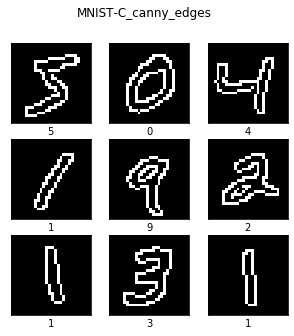

In [47]:
corruption = 'canny_edges'
(x_train_c, y_train_c), (x_test_c, y_test_c) = load_mnist_c(corruption)

print(f'MNIST-C shape: {x_train_c.shape, x_test_c.shape}')
show_numbers(x_train_c, y_train_c, title=f"MNIST-C_{corruption}")    
    

In [49]:
save_images(x_train_c[:30])

In [50]:
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]08-Mar-21 03:16:39 -  INFO - [++] Running workflow: [mnist].
08-Mar-21 03:16:39 -  INFO - [+] Running env: [mnist:predictor].
08-Mar-21 03:16:40 -  INFO - [+] Running (predictor.py). 
08-Mar-21 03:16:40 -  INFO - [+] Output:     predictions
0            5
1            0
2            4
3            8
4            9
 
08-Mar-21 03:16:40 -  INFO - [+] Environment (predictor) finished successfully. 
08-Mar-21 03:16:40 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

Elapsed time: 1.4353790283203125


# Tracker

In [ ]:
from scanflow import track

tracker = track.Tracker(app_dir)
X_test_path = tracker.list_artifacts('mnist', '2d4ec92be0d64e27aea4f50d4aeaf462')
X_test = pd.read_csv(X_test_path['query_per_second_test.csv'])
X_train = pd.read_csv(X_test_path['query_per_second_train.csv'])
X_test.sample(5)